<center>
    <img src="https://ecfm.usac.edu.gt/sites/default/files/2019-02/cintillo.png" width="1000" alt="ecfm logo">
</center>

# Proyecto: Precesión y perihelio de Mercurio
Autor: Nicolás Esteban Poyón Castro

Curso: Física Computacional

## Objetivos

*   Realizar una función de Runge-Kutta con la fuerza total que actúa sobre Mercurio
* Calcular la órbita de Mercurio
* Determinar la cantidad de precesión del perihelio de Mercurio para distintos valores de α
* Deducir el valor de la cantidad de precesión para el valor α = 1,1 × 10−8UA$^2$

## 1. Definición de la función de Runge-Kutta de la fuerza total que actúa sobre Mercurio
* ### Función de la fuerza gravitacional
Para Mercurio la fuerza de gravedad del sistema Mercurio-Sol que predice la teoría general de la relatividad está dada por
\begin{align}
F = \frac{GM_SM_M}{r^{3}}\left(1+\frac{α}{r^2}\right)
\end{align}
A partir de esto encontramos que las ecuaciones de movimiento de Mercurio están dadas por:
\begin{cases}
\frac{dx}{dt} & =v_{x}\\
\frac{dv_{x}}{dt} & =-\frac{GM_{S}}{r^{3}}\left(1+\frac{α}{r^2}\right)x\\
\frac{dy}{dt} & =v_{y}\\
\frac{dv_{y}}{dt} & =-\frac{GM_{S}}{r^{3}}\left(1+\frac{α}{r^2}\right)y,
\end{cases}
con $r=\sqrt{x^{2}+y^{2}}$.
La función recurrente para el método numérico está dada por:
\begin{align}
a_{i}=-\frac{GM_S}{r^{3}}\left(1+\frac{α}{r^2}\right)i,
\end{align}
con $i=x,y$.

* ### Método de Runge-Kutta
Aquí, el método de Runge-Kutta genera como solución:
\begin{cases}
x_{n+1} & =x_{n}+k_{2}\\
v_{n+1}^{x} & =v_{n}^{x}+k_{4}\\
y_{n+1} & =y_{n}+k_{2}^{'}\\
v_{n+1}^{y} & =v_{n}^{y}+k_{4}^{'}\\
R_{n} & =\sqrt{\left(x_n+\frac{1}{2}k_1 \right)^{2}+\left(y_{n}+\frac{1}{2}k_{1}^{'}\right)^{2}}
\end{cases}
donde,
\begin{array}{llll}
k_{1}=v_{n}^{x}\Delta t, & k_{2}=\left(v_{n}^{x}+\frac{1}{2}k_{3}\right)\Delta t, & k_{3}=-\frac{GM_{S}}{r_{n}^{3}}\left(1+\frac{α}{r_n^2}\right)x_{n}\Delta t, & k_{4}=-\frac{GM_{S}}{R_{n}^{3}}\left(1+\frac{α}{R_n^2}\right)\left(x_{n}+\frac{1}{2}k_{1}\right)\Delta t\\
k_{1}^{'}=v_{n}^{y}\Delta t, & k_{2}^{'}=\left(v_{n}^{y}+\frac{1}{2}k_{3}^{'}\right)\Delta t, & k_{3}^{'}=-\frac{GM_{S}}{r_{n}^{3}}\left(1+\frac{α}{r_n^2}\right)y_{n}\Delta t, & k_{4}^{'}=-\frac{GM_{S}}{R_{n}^{3}}\left(1+\frac{α}{R_n^2}\right)\left(y_{n}+\frac{1}{2}k_{1}^{'}\right)\Delta t\\
r_{n}=\sqrt{x_n^2+y_n^2}.
\end{array}
Las condiciones iniciales que se utilizaran son las siguientes:
 * $x_{0}=(1+e)a$,
 * $y_{0}=0$
 * $v^{x}_{0}=0$,
 * $v^{y}_{0}=\sqrt{\frac{G M_S}{a}\frac{1-e}{1+e}}\text{
   AU}/\text{año}$
 * $GM_{S}=4\pi^{2}\text{  UA}^{3}/\text{año}^{2}$
 * N = 20000
 * $\Delta t=0.0001$

In [ ]:
# Importando librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Datos del problema
a = 0.39
e = 0.206
GM_S = 4*np.pi**2
dt = 0.0001
N = 20000
# Condiciones iniciales
x0 = (1+e)*a
y0 = 0
vx0 = 0
vy0 = np.sqrt(GM_S*(1-e)/(a*(1+e)))


In [ ]:
# Función de la aceleración
def aceleracion(x, y, GM_S, alfa):
  r = np.sqrt(x**2 + y**2)
  a_x = -GM_S/r**3 * (1+alfa/r**2)*x
  a_y = -GM_S/r**3 * (1+alfa/r**2)*y
  return a_x, a_y

In [ ]:
# Implementación del método de Runge-Kutta
def Runge_Kutta(x0, vx0, y0, vy0, dt, N, alfa):
  # Listas para guardar los valores de las variables
  X = []
  Y = []
  VX = []
  VY = []
  # Valores iniciales
  x = x0
  y = y0
  vx = vx0
  vy = vy0

  # Calculo de los nuevos valores de las variables
  for i in range(N):
    # Llamamos a la función de la aceleración
    a_x, a_y = aceleracion(x, y, GM_S, alfa)

    # Calculo de los valores de las variables K_i y R_n
    k1_x = dt*vx
    k1_y = dt*vy
    R = np.sqrt((x + 0.5*k1_x)**2 + (y + 0.5*k1_y)**2)
    k3_x = dt*a_x
    k3_y = dt*a_y
    k2_x = dt*(vx + k3_x/2)
    k2_y = dt*(vy+ k3_y/2)
    k4_x = -GM_S/R**3*(1+alfa/R**2)*(x + 0.5*k1_x)*dt
    k4_y = -GM_S/R**3*(1+alfa/R**2)*(y + 0.5*k1_y)*dt

    # Actualización de las variables
    x = x + k2_x
    vx = vx + k4_x
    y = y + k2_y
    vy = vy + k4_y

    # Se añaden los nuevos valores a las listas
    X.append(x)
    Y.append(y)
    VX.append(vx)
    VY.append(vy)

  # La función devuelve los valores de posición y velocidad
  return  X, Y, VX, VY

## 2. Calculo de la Órbita y de la Precesión del Perihelio de Mercurio

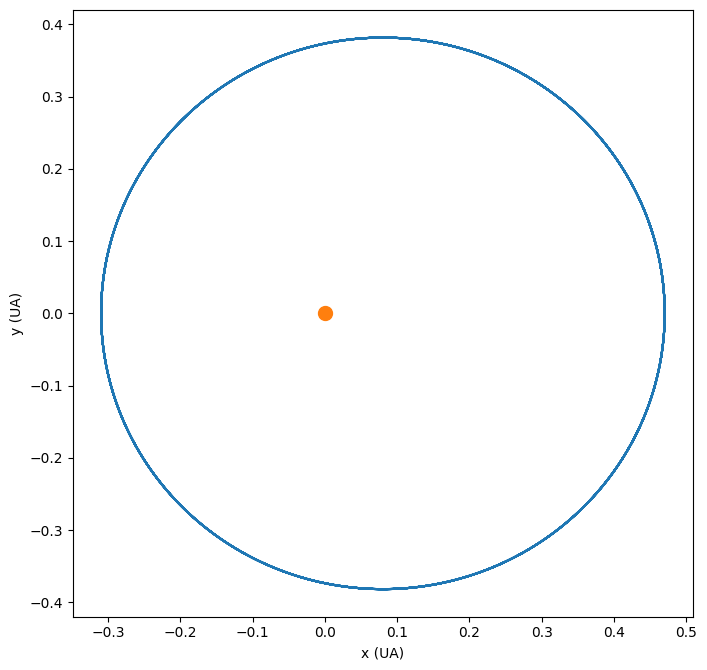

In [ ]:
# Obtenemos los valores de la posición y velocidad de mercurio para α = 1.1e-8
x_0, y_0, vx_0, vy_0 = Runge_Kutta(x0, vx0, y0, vy0, dt, N, 1.1e-8)

# Graficamos la órbita de Mercurio para este valor de α
plt.figure(figsize=(8, 8))
plt.plot(x_0, y_0)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(0,0,'o',markersize=10)
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.show()

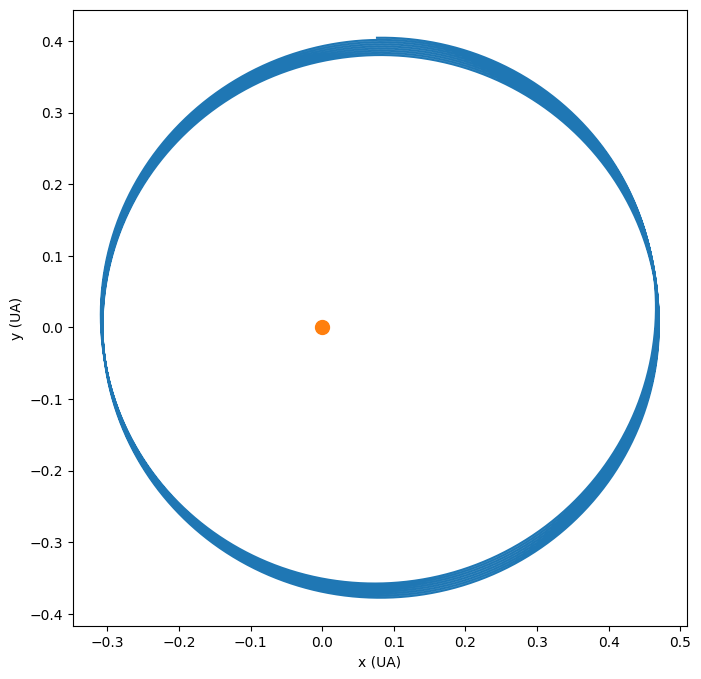

In [ ]:
# Obtenemos los valores de la posición y velocidad de mercurio para α = 0.0008
x_1, y_1, vx_1, vy_1 = Runge_Kutta(x0, vx0, y0, vy0, dt, N, 0.0008)

# Graficamos la órbita de Mercurio para este valor de α
plt.figure(figsize=(8, 8))
plt.plot(x_1, y_1)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(0,0,'o',markersize=10)
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.show()

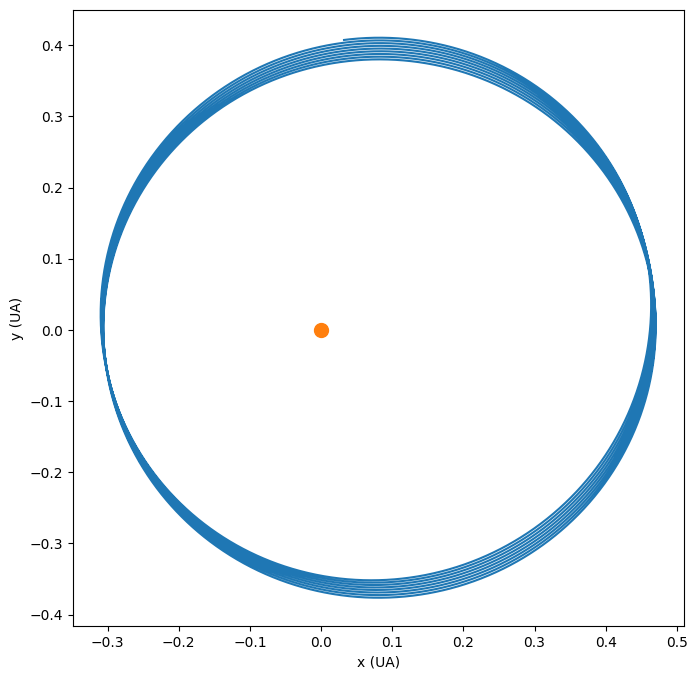

In [ ]:
# Obtenemos los valores de la posición y velocidad de mercurio para α = 0.001
x_2, y_2, vx_2, vy_2 = Runge_Kutta(x0, vx0, y0, vy0, dt, N, 0.001)

# Graficamos la órbita de Mercurio para este valor de α
plt.figure(figsize=(8, 8))
plt.plot(x_2, y_2)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(0,0,'o',markersize=10)
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.show()

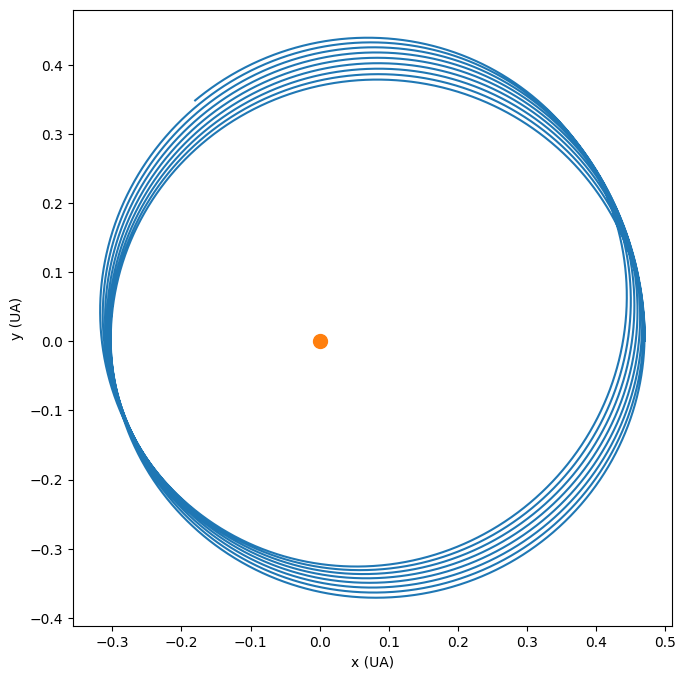

In [ ]:
# Obtenemos los valores de la posición y velocidad de mercurio para α = 0.002
x_3, y_3, vx_3, vy_3 = Runge_Kutta(x0, vx0, y0, vy0, dt, N, 0.002)

# Graficamos la órbita de Mercurio para este valor de α
plt.figure(figsize=(8, 8))
plt.plot(x_3, y_3)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(0,0,'o',markersize=10)
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.show()

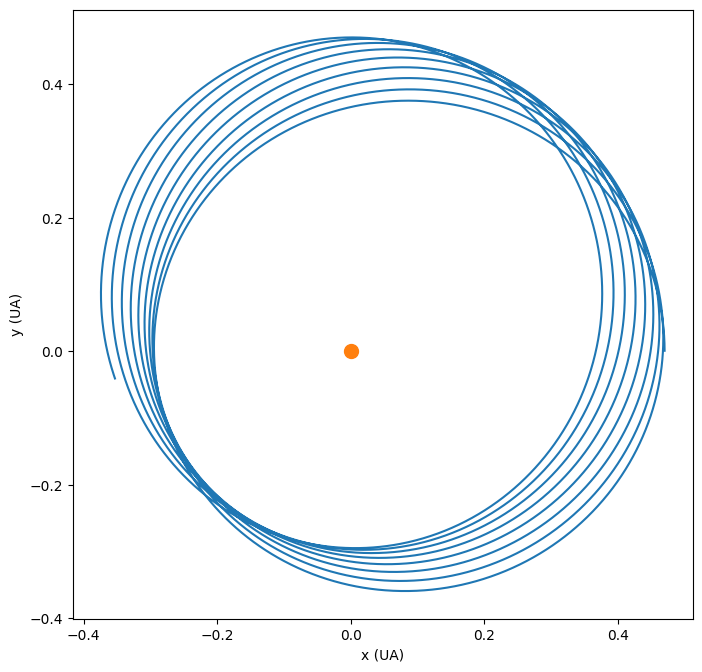

In [ ]:
# Obtenemos los valores de la posición y velocidad de mercurio para α = 0.004
x_4, y_4, vx_4, vy_4 = Runge_Kutta(x0, vx0, y0, vy0, dt, N, 0.004)

# Graficamos la órbita de Mercurio para este valor de α
plt.figure(figsize=(8, 8))
plt.plot(x_4, y_4)
plt.plot(0,0,'o',markersize=10)
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
# Listas para guardar los valores de tiempo y distancia
T = []
D1 = []
D2 = []
D3 = []
D4 = []

# Valores para el tiempo
for i in range(N):
  T.append(dt*i)

# Datos de la distancia para α = 0.0008
for i in range(N):
  D1.append(np.sqrt(x_1[i]**2 + y_1[i]**2))

# Datos de la distancia para α = 0.001
for i in range(N):
  D2.append(np.sqrt(x_2[i]**2 + y_2[i]**2))

# Datos de la distancia para α = 0.002
for i in range(N):
  D3.append(np.sqrt(x_3[i]**2 + y_3[i]**2))

# Datos de la distancia para α = 0.004
for i in range(N):
  D4.append(np.sqrt(x_4[i]**2 + y_4[i]**2))

dθ/dt para α = 0.0008:  8.63


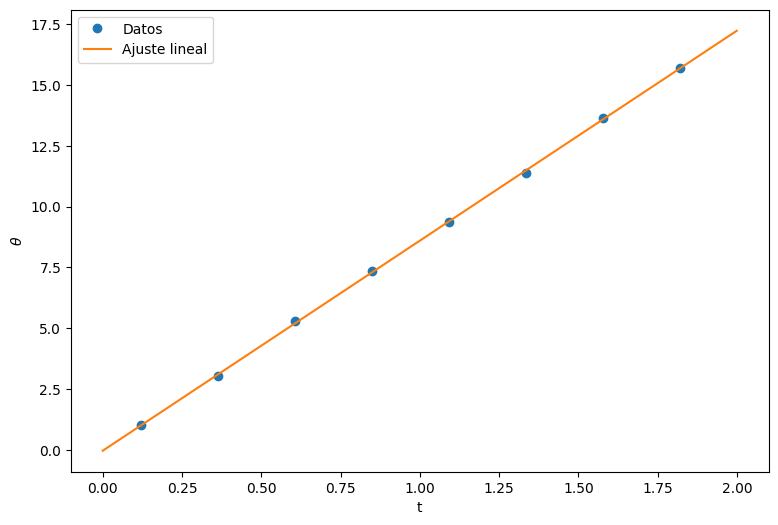

In [ ]:
# Listas para guardar los valores de "x", "y" y el angulo respecto al eje x en el perihelio y también
# el tiempo en el que se alcanza esta posición para α = 0.0008
x_m1 = []
y_m1 = []
ang1 = []
v1 =[]
jn1=[]

# Obtenemos los valores de "x" y "y" en el perihelio
for j in range(len(D1)-1):
  if D1[j]<D1[j+1] and D1[j]<D1[j-1]:
    x_m1.append(x_1[j])
    y_m1.append(y_1[j])
    # Agregamos el valor de la posición en la lista de estos datos
    jn1.append(j)

# Calculamos los angulos que se obtienen en el perihelio
for i in range(len(x_m1)):
  ang1.append(np.arctan(y_m1[i]/x_m1[i])*180/np.pi)

# Obtenemos el tiempo en el que se alcanza el perihelio
for i in range(len(x_m1)):
  v1.append(T[jn1[i]])

# Calculamos la precesión del perihelio de Mercurio
m1, b1, r1, p1, std_err = stats.linregress(v1, ang1)
print('dθ/dt para α = 0.0008: ',round(m1,3))

# Hacemos una grafica de angulo vs tiempo junto con el ajuste lineal hecho para obtener el valor de precesión
plt.figure(figsize=(9, 6))
plt.plot(v1, ang1, 'o', T, m1*np.array(T)+b1)
plt.legend(['Datos', 'Ajuste lineal'])
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.show()

dθ/dt para α = 0.001:  10.799


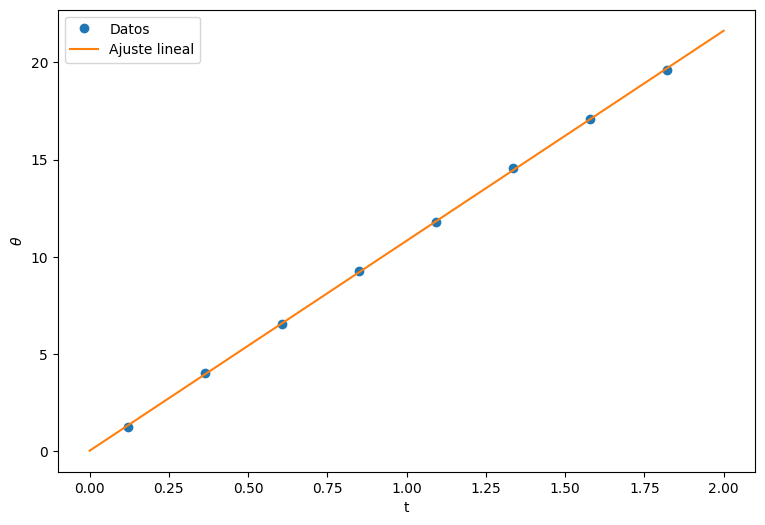

In [ ]:
# Listas para guardar los valores de "x", "y" y el angulo respecto al eje x en el perihelio y también
# el tiempo en el que se alcanza esta posición para α = 0.001
x_m2 = []
y_m2 = []
ang2 = []
jn2=[]
v2=[]

# Obtenemos los valores de "x" y "y" en el perihelio
for j in range(len(D2)-1):
  if D2[j]<D2[j+1] and D2[j]<D2[j-1]:
    x_m2.append(x_2[j])
    y_m2.append(y_2[j])
    jn2.append(j)

# Calculamos los angulos que se obtienen en el perihelio
for i in range(len(x_m2)):
  ang2.append(np.arctan(y_m2[i]/x_m2[i])*180/np.pi)

# Obtenemos el tiempo en el que se alcanza el perihelio
for i in range(len(x_m2)):
  v2.append(T[jn2[i]])

# Calculamos la precesión del perihelio de Mercurio
m2, b2, r2, p2, std_err = stats.linregress(v2, ang2)
print('dθ/dt para α = 0.001: ', round(m2,3))

# Hacemos una grafica de angulo vs tiempo junto con el ajuste lineal hecho para obtener el valor de precesión
plt.figure(figsize=(9, 6))
plt.plot(v2, ang2, 'o', T, m2*np.array(T)+b2)
plt.legend(['Datos', 'Ajuste lineal'])
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.show()

dθ/dt para α = 0.002: 22.143


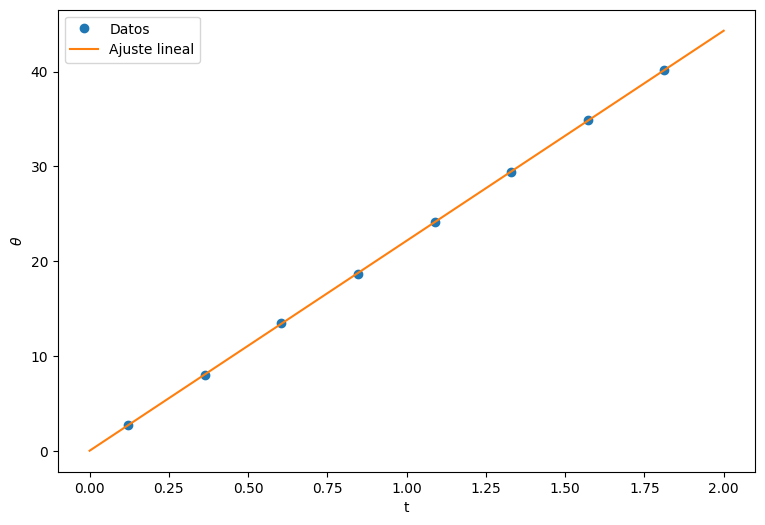

In [ ]:
# Listas para guardar los valores de "x", "y" y el angulo respecto al eje x en el perihelio y también
# el tiempo en el que se alcanza esta posición para α = 0.002
x_m3 = []
y_m3 = []
ang3 = []
jn3=[]
v3=[]

# Obtenemos los valores de "x" y "y" en el perihelio
for j in range(len(D3)-1):
  if D3[j]<D3[j+1] and D3[j]<D3[j-1]:
    x_m3.append(x_3[j])
    y_m3.append(y_3[j])
    jn3.append(j)

# Calculamos los angulos que se obtienen en el perihelio
for i in range(len(x_m3)):
  ang3.append(np.arctan(y_m3[i]/x_m3[i])*180/np.pi)

# Obtenemos el tiempo en el que se alcanza el perihelio
for i in range(len(x_m3)):
  v3.append(T[jn3[i]])

# Calculamos la precesión del perihelio de Mercurio
m3, b3, r3, p3, std_err = stats.linregress(v3, ang3)
print('dθ/dt para α = 0.002:', round(m3,3))

# Hacemos una grafica de angulo vs tiempo junto con el ajuste lineal hecho para obtener el valor de precesión
plt.figure(figsize=(9, 6))
plt.plot(v3, ang3, 'o', T, m3*np.array(T)+b3)
plt.legend(['Datos', 'Ajuste lineal'])
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.show()

dθ/dt para α = 0.004: 46.411


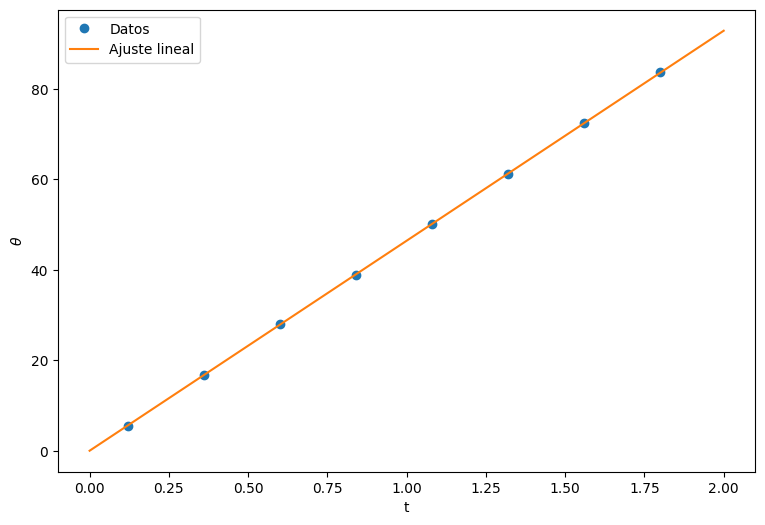

In [ ]:
# Listas para guardar los valores de "x", "y" y el angulo respecto al eje x en el perihelio y también
# el tiempo en el que se alcanza esta posición para α = 0.004
x_m4 = []
y_m4 = []
ang4 = []
jn4=[]
v4=[]

# Obtenemos los valores de "x" y "y" en el perihelio
for j in range(len(D4)-1):
  if D4[j]<D4[j+1] and D4[j]<D4[j-1]:
    x_m4.append(x_4[j])
    y_m4.append(y_4[j])
    jn4.append(j)

# Calculamos los angulos que se obtienen en el perihelio
for i in range(len(x_m4)):
  ang4.append(np.arctan(y_m4[i]/x_m4[i])*180/np.pi)

# Obtenemos el tiempo en el que se alcanza el perihelio
for i in range(len(x_m4)):
  v4.append(T[jn4[i]])

# Calculamos la precesión del perihelio de Mercurio
m4, b4, r4, p4, std_err = stats.linregress(v4, ang4)
print('dθ/dt para α = 0.004:', round(m4,3))

# Hacemos una grafica de angulo vs tiempo junto con el ajuste lineal hecho para obtener el valor de precesión
plt.figure(figsize=(9, 6))
plt.plot(v4, ang4, 'o', T, m4*np.array(T)+b4)
plt.legend(['Datos', 'Ajuste lineal'])
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.show()

## Valor de Precesión para α = 1.1e-8

a = 11656.628  (grados*UA^2)/año
dθ/dt para α = 1.1e-8: 0.0001282229123040917 grados/año
dθ/dt para α = 1.1e-8: 46.16 segundos de arco/siglo


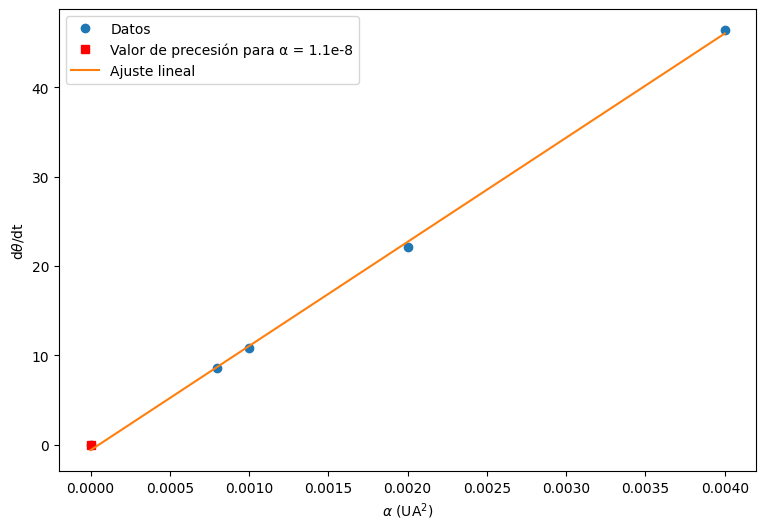

In [ ]:
# Valores de precesión y su respectivo α
pendiente = [0,m1, m2, m3, m4]
alfa = [0,0.0008, 0.001, 0.002, 0.004]

# Calculamos la derivada de la precesión del perihelio
m5, b5, r5, p5, std_err= stats.linregress(alfa,pendiente)
print('a =',round(m5, 3),' (grados*UA^2)/año')

# Calculamos la precesión para α = 1.1e-8
variacion_alfa0 = m5*1.1e-8
print('dθ/dt para α = 1.1e-8:', variacion_alfa0, 'grados/año')
print('dθ/dt para α = 1.1e-8:', round(variacion_alfa0*3600*100, 3), 'segundos de arco/siglo')

# Hacemos una grafica del valor de precesión vs α junto con el ajuste lineal hecho para obtener el valor de "a"
# y el valor de precesión calculado para α = 1.1e-8
plt.figure(figsize=(9, 6))
plt.plot(alfa, pendiente, 'o',  1.1e-8,variacion_alfa0, 'sr', alfa,m5*np.array(alfa)+b5)
plt.legend(['Datos', 'Valor de precesión para α = 1.1e-8', 'Ajuste lineal'])
plt.xlabel('$\\alpha$ (UA$^2$)')
plt.ylabel('d$\\theta$/dt')
plt.show()

Nota: Se realizaron animaciones de la órbita de Mercurio pero debido al tiempo de ejecución se omiten. El resultado obtenido, con el uso de los datos calculados para α=0.004 se puede observar en el siguiente enlace: [Órbita de Mercurio alrededor del Sol](https://drive.google.com/file/d/1aarftVbYCe77CicDsMO2ACxLFisMTsN4/view?usp=drive_link)